# Phase 2 Project (Group 5) 


<h1><center>From Scripts to Screens: Analyzing Revenue, Genre Evolution and Industry Trends in Movie Production</center></h1>


![Movie Theater Night Out](https://www.fromfrugaltofree.com/wp-content/uploads/2023/12/movie-theater-night-out-e1691641716226-1170x550.jpg.webp)

## Project Problem

Your company now sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of your company's new movie studio can use to help decide what type of films to create.

## 1. Project Introduction

In recent years, the film industry has experienced rapid growth, with streaming services and traditional studios alike competing for viewers' attention. For companies entering this space, understanding the dynamics of profitability is essential. One of the most influential factors in a movie's financial success is its genre, which can heavily influence production costs, audience appeal, and box office revenue. This report explores the profitability of different film genres, helping new studios make data-informed decisions about which genres to focus on in future productions.

As we analyze the trends and performance metrics associated with various genres, our goal is to identify patterns and factors contributing to profitability. This analysis not only focuses on historical box office success but also considers seasonal trends, budget requirements, and audience preferences to create a comprehensive view of genre-driven profitability.

---

*Key Questions Addressed in This Report:*

Q1. What is the relationship between production budgets and profitability in terms of both Domestic Earnings and Worldwide Earnings?

Q2. Which Genres Are Most Profitable, and What Key Trends Exist in Box Office Performance?

Q3. How do certain directors influence, and which directors consistently contribute to higher success in box office performance?

Q4. How do critic ratings and audience ratings correlate with the box office performance metrics movies?

Q5. What are the market trends by year whether seasonal or annual that influences box office success?

This report combines historical data with analytical insights to help studios navigate the complex landscape of genre profitability. By addressing these questions, it aims to offer practical guidance on selecting film genres that align with both audience demand and financial objectives.


## 2. Data Collection

In this section, we want to make sure the data covers a reasonable time range to analyze recent trends and we also want to ensure consistency in the data especially regarding the revenue.
The sources of the data are ;
- Rotten Tomatoes
- The Numbers

In [172]:
# import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import requests
import zipfile
import os
import warnings
warnings.filterwarnings('ignore')


In [173]:
# Loading the rt.movie_info dataframe

df_movie_info = pd.read_csv('zippedData/rt.movie_info.tsv.gz', compression='gzip', sep='\t')
df_movie_info.head()


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [174]:
# Loading the tn.movie_budgets dataframe

df_movie_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz', compression='gzip')
df_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [175]:
# Loading the rt.reviews dataframe

df_reviews = pd.read_csv('zippedData/rt.reviews.tsv.gz', compression='gzip', sep='\t', encoding='ISO-8859-1')
df_reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


## 3. Data Cleaning and Reprocessing

#### Handle missing data, data formatting and data transformation

### DF 1 : Movie_budget

In [179]:
# Checking the first 5 movie_budget rows

df_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [180]:
# Checking the df contents

df_movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [181]:
# Changing the column names in the df_movie_budget to title case.

df_movie_budgets.columns = df_movie_budgets.columns.str.title()

In [182]:
# Converting `release_date` to datetime format

df_movie_budgets['Release_Date'] = pd.to_datetime(df_movie_budgets['Release_Date'], format='%b %d, %Y')

In [183]:
# Extracting the year from the Release_Date column

df_movie_budgets['Year'] = df_movie_budgets['Release_Date'].dt.year

In [184]:
# Converting currency columns to numeric by removing the dollar sign

for col in ['Production_Budget', 'Domestic_Gross', 'Worldwide_Gross']:
  df_movie_budgets[col] = df_movie_budgets[col].replace('[\$,]', '', regex=True).astype(float)


In [185]:
# Inspecting the first 5 rows of df_movie_budget after conversion

df_movie_budgets.head()

,Id,Release_Date,Movie,Production_Budget,Domestic_Gross,Worldwide_Gross,Year
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,2009
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,2019
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,2017


### DF 2 : movie_info

In [187]:
# Checking the df contents

df_movie_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [188]:
# Changing the column names in the df_movie_info to title case.

df_movie_info.columns = df_movie_info.columns.str.title()
df_movie_info.columns

Index(['Id', 'Synopsis', 'Rating', 'Genre', 'Director', 'Writer',
       'Theater_Date', 'Dvd_Date', 'Currency', 'Box_Office', 'Runtime',
       'Studio'],
      dtype='object')

Based on our objectives, we'll be looking at `'Id'`, `'Rating'`, `'Genre'`, `'Director'`, `'Runtime'`. Therefore, all other columns will be dropped for the purpose of simplified process.

In [190]:
# Identifying the relevant columns 

Relevant_columns =['Id', 'Rating', 'Genre', 'Director', 'Runtime']
df_movie_info = df_movie_info[Relevant_columns]

In [191]:
# Dropping NaN values from the 'Rating', 'Genre', and 'Runtime' columns

df_movie_info = df_movie_info.dropna(subset=['Rating', 'Genre', 'Runtime'])
df_movie_info.head()

,Id,Rating,Genre,Director,Runtime
0,1,R,Action and Adventure|Classics|Drama,William Friedkin,104 minutes
1,3,R,Drama|Science Fiction and Fantasy,David Cronenberg,108 minutes
2,5,R,Drama|Musical and Performing Arts,Allison Anders,116 minutes
3,6,R,Drama|Mystery and Suspense,Barry Levinson,128 minutes
4,7,NR,Drama|Romance,Rodney Bennett,200 minutes


In [192]:
# Checking the shape of the dataframe

df_movie_info.shape

(1526, 5)

After dropping irrelevant columns and the NaN values for the relevant columns, we noted that the data is more streamlined and there was no significant impact to the data.

Since unknown directors will be bundled under one value, we will replace the missing values under the `Director` column to Unknown so that the data is not skewed.

In [196]:
# Replace actual NaN values with 'Unknown' in the 'Director' column

df_movie_info['Director'] = df_movie_info['Director'].replace(np.nan, 'Unknown')
df_movie_info.head()

,Id,Rating,Genre,Director,Runtime
0,1,R,Action and Adventure|Classics|Drama,William Friedkin,104 minutes
1,3,R,Drama|Science Fiction and Fantasy,David Cronenberg,108 minutes
2,5,R,Drama|Musical and Performing Arts,Allison Anders,116 minutes
3,6,R,Drama|Mystery and Suspense,Barry Levinson,128 minutes
4,7,NR,Drama|Romance,Rodney Bennett,200 minutes


In [197]:
# Converting "Runtime" in the df_movie_info  by removing the word "minutes" and converting the values to integers.

for col in ['Runtime']:
  df_movie_info[col] =  df_movie_info[col].replace('minutes', '', regex=True).astype(int)

In [198]:
# To split the Genre column values into a list

df_movie_info['Genre'] = df_movie_info['Genre'].str.split('|')

# Explode the list to create separate rows for each genre

df_movie_info = df_movie_info.explode('Genre')
df_movie_info.head()

,Id,Rating,Genre,Director,Runtime
0,1,R,Action and Adventure,William Friedkin,104
0,1,R,Classics,William Friedkin,104
0,1,R,Drama,William Friedkin,104
1,3,R,Drama,David Cronenberg,108
1,3,R,Science Fiction and Fantasy,David Cronenberg,108


In [199]:
# Find the unique values in the "Rating" column of the df_movie_info.

df_movie_info['Rating'].unique()

array(['R', 'NR', 'PG', 'PG-13', 'G', 'NC17'], dtype=object)

In [200]:
# Mapping abbreviated movie ratings in the "Rating" column of the df_movie_info to their full descriptive names.

rating_mapping = {
    'G': 'General Audience',
    'PG': 'Parental Guidance Suggested',
    'PG-13': 'Parents Strongly Cautioned',
    'R': 'Restricted',
    'NC17': 'Adults Only',
    'NR': 'Not Rated'
}
df_movie_info['Rating'] = df_movie_info['Rating'].replace(rating_mapping)

# Check the result

df_movie_info['Rating'].unique()



array(['Restricted', 'Not Rated', 'Parental Guidance Suggested',
       'Parents Strongly Cautioned', 'General Audience', 'Adults Only'],
      dtype=object)

In [201]:
# Checking the df shape after conversions

df_movie_info.head()

,Id,Rating,Genre,Director,Runtime
0,1,Restricted,Action and Adventure,William Friedkin,104
0,1,Restricted,Classics,William Friedkin,104
0,1,Restricted,Drama,William Friedkin,104
1,3,Restricted,Drama,David Cronenberg,108
1,3,Restricted,Science Fiction and Fantasy,David Cronenberg,108


In [202]:
# Checking df info after conversions

df_movie_info.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3525 entries, 0 to 1559
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Id        3525 non-null   int64 
 1   Rating    3525 non-null   object
 2   Genre     3525 non-null   object
 3   Director  3525 non-null   object
 4   Runtime   3525 non-null   int32 
dtypes: int32(1), int64(1), object(3)
memory usage: 151.5+ KB


### DF 3. reviews

In [204]:
# Checking the first 5 df_reviews

df_reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [205]:
# Checking the df contents

df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [206]:
# Convert the reviews column to title case

df_reviews.columns = df_reviews.columns.str.title()
df_reviews.columns

Index(['Id', 'Review', 'Rating', 'Fresh', 'Critic', 'Top_Critic', 'Publisher',
       'Date'],
      dtype='object')

In [207]:
# Identifying the relevant columns for the table we're working with

Relevant_columns = ['Id', 'Rating', 'Critic', 'Top_Critic']
df_reviews = df_reviews[Relevant_columns]

In [208]:
# Inspecting table data

df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Id          54432 non-null  int64 
 1   Rating      40915 non-null  object
 2   Critic      51710 non-null  object
 3   Top_Critic  54432 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 1.7+ MB


Since unknown critics will be bundled under one value, we will replace the missing values under the `Critic` column to Unknown so that the data is not skewed.

In [210]:
# Inspect for unique values in the 'Critic' column

df_reviews['Critic'].unique()

array(['PJ Nabarro', 'Annalee Newitz', 'Sean Axmaker', ..., 'Raam Tarat',
       'Jeremy Conrad', 'Bob Cannon'], dtype=object)

In [211]:
# Replace NaN values with unknown 

df_reviews['Critic'] = df_reviews['Critic'].replace(np.nan, 'Unknown')
df_reviews['Critic'].isnull().sum()

0

In [212]:
# Inspect for unique values in the Top_critic column

df_reviews['Top_Critic'].unique()

array([0, 1], dtype=int64)

In [213]:
# Mapping the Top_Critic column to represent Boolean values

df_reviews['Top_Critic'] = df_reviews['Top_Critic'].astype(str)
Top_critic_mapping = {
    '0': 'False',
    '1': 'True',
}
df_reviews['Top_Critic'] = df_reviews['Top_Critic'].replace(Top_critic_mapping)

# Check the result

df_reviews['Top_Critic'].unique()



array(['False', 'True'], dtype=object)

In [214]:
# Show the first 5 rows of the df_reviews dataframe

df_reviews.head()

,Id,Rating,Critic,Top_Critic
0,3,3/5,PJ Nabarro,False
1,3,NaN,Annalee Newitz,False
2,3,NaN,Sean Axmaker,False
3,3,NaN,Daniel Kasman,False
4,3,NaN,Unknown,False


In [215]:
# Checking the unique values in the `Rating` column

df_reviews['Rating'].unique()

array(['3/5', nan, 'C', '2/5', 'B-', '2/4', 'B', '3/4', '4/5', '4/4',
       '6/10', '1/4', '8', '2.5/4', '4/10', '2.0/5', '3/10', '7/10', 'A-',
       '5/5', 'F', '3.5/4', 'D+', '1.5/4', '3.5/5', '8/10', 'B+', '9/10',
       '2.5/5', '7.5/10', '5.5/10', 'C-', '1.5/5', '1/5', '5/10', 'C+',
       '0/5', '6', '0.5/4', 'D', '3.1/5', '3/6', '4.5/5', '0/4', '2/10',
       'D-', '7', '1/10', '3', 'A+', 'A', '4.0/4', '9.5/10', '2.5',
       '2.1/2', '6.5/10', '3.7/5', '8.4/10', '9', '1', '7.2/10', '2.2/5',
       '0.5/10', '5', '0', '2', '4.5', '7.7', '5.0/5', '8.5/10', '3.0/5',
       '0.5/5', '1.5/10', '3.0/4', '2.3/10', '4.5/10', '4/6', '3.5',
       '8.6/10', '6/8', '2.0/4', '2.7', '4.2/10', '5.8', '4', '7.1/10',
       '5/4', 'N', '3.5/10', '5.8/10', 'R', '4.0/5', '0/10', '5.0/10',
       '5.9/10', '2.4/5', '1.9/5', '4.9', '7.4/10', '1.5', '2.3/4',
       '8.8/10', '4.0/10', '2.2', '3.8/10', '6.8/10', '7.3', '7.0/10',
       '3.2', '4.2', '8.4', '5.5/5', '6.3/10', '7.6/10', '8.1/10',
  

In [216]:
# Standardizing the Rating values

def convert_rating(value):
    if pd.isna(value):
        return np.nan
    
    letter_grades = {
        'A+': 4.5, 'A': 4.0, 'A-': 3.7,
        'B+': 3.3, 'B': 3.0, 'B-': 2.7,
        'C+': 2.3, 'C': 2.0, 'C-': 1.7,
        'D+': 1.3, 'D': 1.0, 'D-': 0.7,
        'F': 0.0, 'F+': 0.0, 'R': 0.0, 'N': np.nan, 'C': np.nan
    }
    
    value_str = str(value).strip()  
    if ' ' in value_str:
        parts = value_str.split()
        whole = parts[0]
        fraction = parts[1].split('/')
        if len(fraction) == 2:
            return float(whole) + float(fraction[0]) / float(fraction[1])
        else:
            return np.nan  
    
    if '/' in value_str:
        fraction = value_str.split('/')
        if len(fraction) == 2:
            return float(fraction[0]) / float(fraction[1])
        else:
            return np.nan 
    
    try:
        return float(value_str)
    except ValueError:
        return letter_grades.get(value_str, np.nan)  

df_reviews['Rating'] = df_reviews['Rating'].apply(convert_rating)

In [217]:
# Inspecting to confirm for standardized values

df_reviews['Rating'].unique()

array([0.6       ,        nan, 0.4       , 2.7       , 0.5       ,
       3.        , 0.75      , 0.8       , 1.        , 0.25      ,
       8.        , 0.625     , 0.3       , 0.7       , 3.7       ,
       0.        , 0.875     , 1.3       , 0.375     , 3.3       ,
       0.9       , 0.55      , 1.7       , 0.2       , 2.3       ,
       6.        , 0.125     , 0.62      , 7.        , 0.1       ,
       4.5       , 4.        , 0.95      , 2.5       , 1.05      ,
       0.65      , 0.74      , 0.84      , 9.        , 0.72      ,
       0.44      , 0.05      , 5.        , 2.        , 7.7       ,
       0.85      , 0.15      , 0.23      , 0.45      , 0.66666667,
       3.5       , 0.86      , 0.42      , 5.8       , 0.71      ,
       1.25      , 0.35      , 0.58      , 0.59      , 0.48      ,
       0.38      , 4.9       , 1.5       , 0.575     , 0.88      ,
       2.2       , 0.68      , 7.3       , 3.2       , 4.2       ,
       8.4       , 1.1       , 0.63      , 0.76      , 0.81   

In [218]:
# Identifying the counts for each unique values

df_reviews['Rating'].value_counts()

Rating
0.600    4813
0.800    4188
0.500    4079
0.750    3664
0.400    3425
         ... 
5.900       1
0.575       1
4.900       1
0.520       1
7.100       1
Name: count, Length: 117, dtype: int64

In [219]:
# Identifying the count of the NaN values

df_reviews['Rating'].isna().sum()

14301

In [220]:
# Dealing with the NaN values by replacing with 0 to ensure the missing values are in numeric format

df_reviews['Rating'] = df_reviews['Rating'].fillna(0)

df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          54432 non-null  int64  
 1   Rating      54432 non-null  float64
 2   Critic      54432 non-null  object 
 3   Top_Critic  54432 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1.7+ MB


## Outputting the cleaned dataframes

In [222]:
df_movie_info_cleaned = df_movie_info.to_csv('cleaned_movie_info.csv')

# Print a message indicating the output
print("The cleaned DataFrame df_movie_info has been successfully saved to 'cleaned_movie_info.csv'.")

The cleaned DataFrame df_movie_info has been successfully saved to 'cleaned_movie_info.csv'.


In [223]:
df_movie_budgets_cleaned = df_movie_budgets.to_csv('cleaned_movie_budgets.csv')

# Print a message indicating the output
print("The cleaned DataFrame df_movie_budgets has been successfully saved to 'cleaned_movie_budgets.csv'.")

The cleaned DataFrame df_movie_budgets has been successfully saved to 'cleaned_movie_budgets.csv'.


In [224]:
df_reviews_cleaned = df_reviews.to_csv('cleaned_reviews.csv')

# Print a message indicating the output
print("The cleaned DataFrame df_reviews has been successfully saved to 'cleaned_reviews.csv'.")

The cleaned DataFrame df_reviews has been successfully saved to 'cleaned_reviews.csv'.


## Loading the cleaned datasets

In [226]:
df_movie_info_cleaned = pd.read_csv('cleaned_movie_info.csv', index_col= 0)
df_movie_info_cleaned.head()

,Id,Rating,Genre,Director,Runtime
0,1,Restricted,Action and Adventure,William Friedkin,104
0,1,Restricted,Classics,William Friedkin,104
0,1,Restricted,Drama,William Friedkin,104
1,3,Restricted,Drama,David Cronenberg,108
1,3,Restricted,Science Fiction and Fantasy,David Cronenberg,108


In [227]:
df_movie_budgets_cleaned = pd.read_csv('cleaned_movie_budgets.csv')
df_movie_budgets_cleaned.head()

,Unnamed: 0,Id,Release_Date,Movie,Production_Budget,Domestic_Gross,Worldwide_Gross,Year
0,0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,2009
1,1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011
2,2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,2019
3,3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015
4,4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,2017


In [228]:
df_reviews_cleaned = pd.read_csv('cleaned_reviews.csv', index_col= 0)
df_reviews_cleaned.head()

,Id,Rating,Critic,Top_Critic
0,3,0.6,PJ Nabarro,False
1,3,0.0,Annalee Newitz,False
2,3,0.0,Sean Axmaker,False
3,3,0.0,Daniel Kasman,False
4,3,0.0,Unknown,False


## 4. Exploratory Data Analysis

## *Objective 1: What is the relationship between production budgets and profitability in terms of both Domestic Gross Earnings and Worldwide Gross Earnings?*

Budget Category Analysis:
  Budget_Category    Avg_Profit  Avg_Profit_Margin  Count
0             Low  3.001826e+07         604.301186   2171
1          Medium  6.468654e+07          91.114039    323
2            High  1.040239e+08          69.770687    160
3       Very High  1.652010e+08          62.062921     23


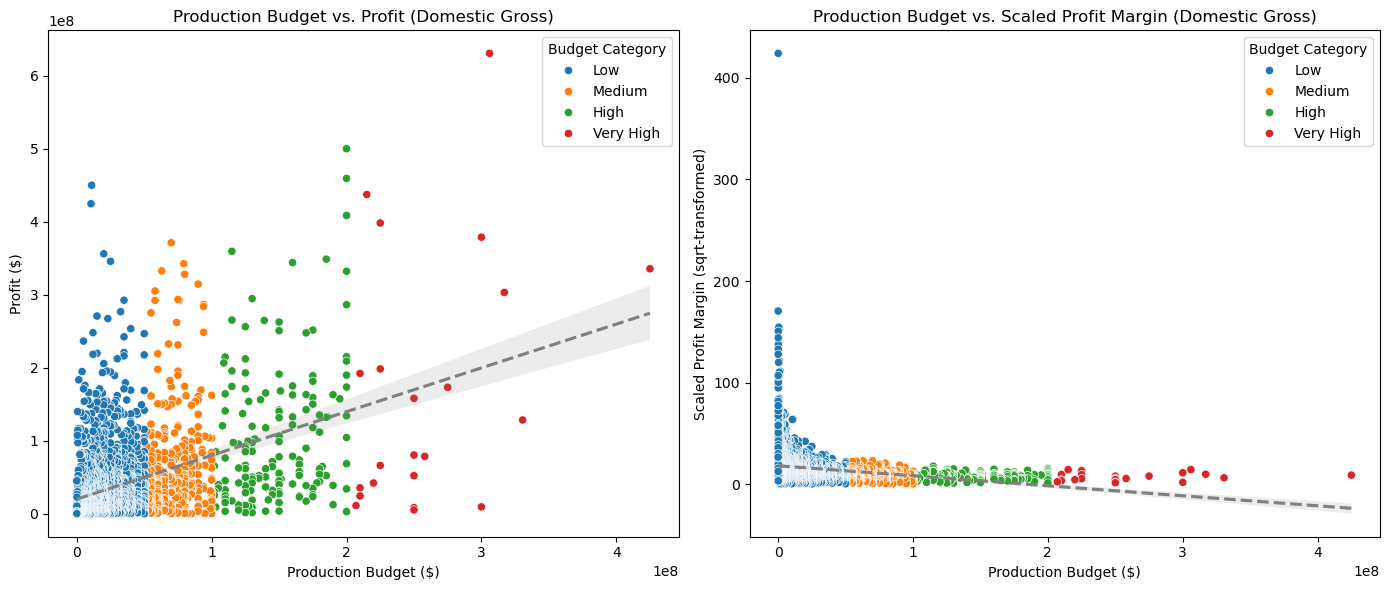

In [231]:
# Calculate Domestic Profit and Domestic Profit Margin

df_movie_budgets_cleaned['Profit'] = df_movie_budgets_cleaned['Domestic_Gross'] - df_movie_budgets_cleaned['Production_Budget']
df_movie_budgets_cleaned = df_movie_budgets_cleaned[df_movie_budgets_cleaned['Profit'] > 0]  

df_movie_budgets_cleaned['Profit_Margin'] = (df_movie_budgets_cleaned['Profit'] / df_movie_budgets_cleaned['Production_Budget']) * 100

# Categorize movies by budget range (adjust ranges as needed)

budget_bins = [0, 50000000, 100000000, 200000000, float('inf')]
budget_labels = ['Low', 'Medium', 'High', 'Very High']
df_movie_budgets_cleaned['Budget_Category'] = pd.cut(df_movie_budgets_cleaned['Production_Budget'], bins=budget_bins, labels=budget_labels)

# Group by Budget Category and calculate mean Profit and Profit Margin

budget_analysis = df_movie_budgets_cleaned.groupby('Budget_Category').agg(
    Avg_Profit=('Profit', 'mean'),
    Avg_Profit_Margin=('Profit_Margin', 'mean'),
    Count=('Profit', 'count')
).reset_index()

print("Budget Category Analysis:")
print(budget_analysis)

# Apply square root transformation to Profit Margin for better visualization

df_movie_budgets_cleaned['Profit_Margin_Scaled'] = np.sqrt(df_movie_budgets_cleaned['Profit_Margin'])

# Set up the figure for side-by-side scatter plots with regression lines
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Scatter plot with line of best fit for Domestic Profit vs. Production Budget
sns.scatterplot(data=df_movie_budgets_cleaned, x='Production_Budget', y='Profit', hue='Budget_Category', ax=ax1)
sns.regplot(data=df_movie_budgets_cleaned, x='Production_Budget', y='Profit', scatter=False, ax=ax1, color='gray', line_kws={"linestyle": "--"})
ax1.set_title("Production Budget vs. Profit (Domestic Gross)")
ax1.set_xlabel("Production Budget ($)")
ax1.set_ylabel("Profit ($)")
ax1.legend(title='Budget Category')

# Scatter plot with line of best fit for Scaled Profit Margin vs. Production Budget
sns.scatterplot(data=df_movie_budgets_cleaned, x='Production_Budget', y='Profit_Margin_Scaled', hue='Budget_Category', ax=ax2)
sns.regplot(data=df_movie_budgets_cleaned, x='Production_Budget', y='Profit_Margin_Scaled', scatter=False, ax=ax2, color='gray', line_kws={"linestyle": "--"})
ax2.set_title("Production Budget vs. Scaled Profit Margin (Domestic Gross)")
ax2.set_xlabel("Production Budget ($)")
ax2.set_ylabel("Scaled Profit Margin (sqrt-transformed)")
ax2.legend(title='Budget Category')

# Display the plots
plt.tight_layout()
plt.show()


### Observations and insights

In the plot to the left, the line of best fit shows a slight positive trend, indicating that higher budgets tend to yield higher profits, but the correlation is weak. Lower-budget movies have a broad range of profits, with many achieving significant gains, while higher-budget movies tend to cluster around moderate profit levels. This suggests that high production costs don’t always guarantee high profits.

In the plot to the right, the line of best fit in this plot shows a clear downward trend, indicating that scaled profit margins decrease as budgets increase. Lower-budget movies tend to have much higher scaled profit margins, suggesting they’re more efficient at turning investments into profits. In contrast, larger budgets generally correlate with lower returns on investment, highlighting the diminishing returns of high-budget productions.



Budget Category Analysis:
  Budget_Category    Avg_Profit  Avg_Profit_Margin  Count
0             Low  6.283054e+07         940.218590   2171
1          Medium  2.285210e+08         317.195366    323
2            High  5.208901e+08         351.347982    160
3       Very High  9.155048e+08         344.386347     23


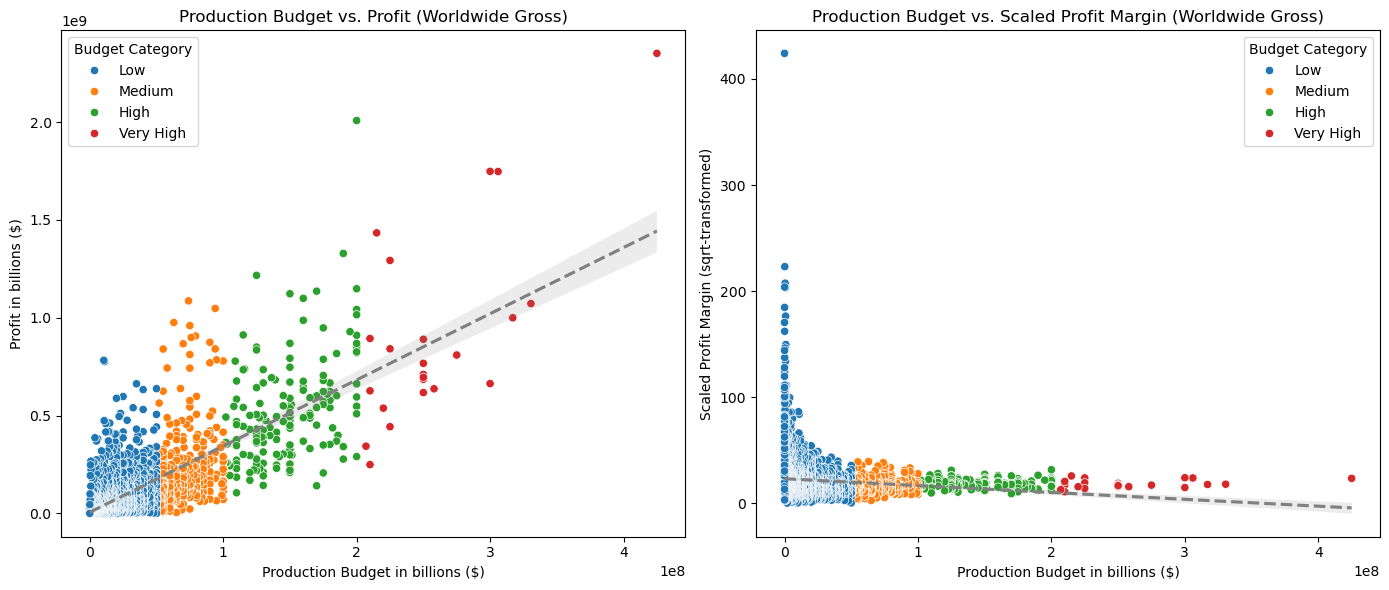

In [233]:
# Calculate Worldwide Profit and Worldwide Profit Margin

df_movie_budgets_cleaned['Profit'] = df_movie_budgets_cleaned['Worldwide_Gross'] - df_movie_budgets_cleaned['Production_Budget']
df_movie_budgets_cleaned = df_movie_budgets_cleaned[df_movie_budgets_cleaned['Profit'] > 0]

df_movie_budgets_cleaned['Profit_Margin'] = (df_movie_budgets_cleaned['Profit'] / df_movie_budgets_cleaned['Production_Budget']) * 100

# Categorize movies by budget range (adjust ranges as needed)

budget_bins = [0, 50000000, 100000000, 200000000, float('inf')]
budget_labels = ['Low', 'Medium', 'High', 'Very High']
df_movie_budgets_cleaned['Budget_Category'] = pd.cut(df_movie_budgets_cleaned['Production_Budget'], bins=budget_bins, labels=budget_labels)

# Group by Budget Category and calculate mean Profit and Profit Margin

budget_analysis = df_movie_budgets_cleaned.groupby('Budget_Category').agg(
    Avg_Profit=('Profit', 'mean'),
    Avg_Profit_Margin=('Profit_Margin', 'mean'),
    Count=('Profit', 'count')
).reset_index()

print("Budget Category Analysis:")
print(budget_analysis)

# Apply square root transformation to Profit Margin for better visualization

df_movie_budgets_cleaned['Profit_Margin_Scaled'] = np.sqrt(df_movie_budgets_cleaned['Profit_Margin'])

# Set up the figure for side-by-side scatter plots with regression lines

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Scatter plot with line of best fit for Worldwide Profit vs. Production Budget

sns.scatterplot(data=df_movie_budgets_cleaned, x='Production_Budget', y='Profit', hue='Budget_Category', ax=ax1)
sns.regplot(data=df_movie_budgets_cleaned, x='Production_Budget', y='Profit', scatter=False, ax=ax1, color='gray', line_kws={"linestyle": "--"})
ax1.set_title("Production Budget vs. Profit (Worldwide Gross)")
ax1.set_xlabel("Production Budget in billions ($)")
ax1.set_ylabel("Profit in billions ($)")
ax1.legend(title='Budget Category')

# Scatter plot with line of best fit for Scaled Profit Margin vs. Production Budget

sns.scatterplot(data=df_movie_budgets_cleaned, x='Production_Budget', y='Profit_Margin_Scaled', hue='Budget_Category', ax=ax2)
sns.regplot(data=df_movie_budgets_cleaned, x='Production_Budget', y='Profit_Margin_Scaled', scatter=False, ax=ax2, color='gray', line_kws={"linestyle": "--"})
ax2.set_title("Production Budget vs. Scaled Profit Margin (Worldwide Gross)")
ax2.set_xlabel("Production Budget in billions ($)")
ax2.set_ylabel("Scaled Profit Margin (sqrt-transformed)")
ax2.legend(title='Budget Category')

# Display the plots

plt.tight_layout()
plt.show()




### Observations and Insights

On the left-side plot, the line of best fit shows a clear positive trend, indicating that higher production budgets are generally associated with higher worldwide profits. This trend is more noticeable than in the Domestic Gross plot, suggesting that large-budget films perform better globally.

On the right-side plot, the line of best fit here shows a strong downward trend, indicating that scaled profit margins decrease significantly as production budgets increase. Lower-budget films achieve the highest scaled profit margins, while higher-budget films, despite their larger profits, show much lower efficiency in generating returns relative to their budgets.
This implies that although high-budget films may earn large absolute profits globally, they’re less efficient in terms of profit margin compared to smaller


### Recommendations based on Objective 1

Whether a domestic or worldwide project, focusing on Low and Medium Budget films while remaining open to larger projects can optimize profitability, and success will depend on careful planning, strategic marketing, and understanding audience preferences.

Lower-budget movies have a wide range of profits, but their maximum profit values are lower than those of high-budget films which sometimes generate profits exceeding $1.5 billion.
This suggests that higher production budgets may be advantageous for reaching broader audiences and generating significant worldwide profits.

### *Objective 2: Which Genres Are Most Profitable, and What Key Trends Exist in Box Office Performance?*

This analysis focuses on both Domestic Gross and Foreign Gross to evaluate genre profitability and identify which types of movies are most likely to drive significant revenue. Understanding these patterns can help guide the studio's genre focus and investment strategy.
